In [1]:
import numpy as np
from sklearn import preprocessing,datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# A. Normalisation de données

### 1. Creation de la matrice X

In [2]:
X = np.array([[1,-1,2],[2,0,0],[0,1,-1]])

### 2. Visualisation et calcul de la moyenne et la variance de X 

In [3]:
print(f'la matrice X est : {X}')
m = np.mean(X)
v = np.var(X)
print(f'la moyenne de la matrice X est : {m}')
print(f'la variance de la matrice X est : {v}')

la matrice X est : [[ 1 -1  2]
 [ 2  0  0]
 [ 0  1 -1]]
la moyenne de la matrice X est : 0.4444444444444444
la variance de la matrice X est : 1.1358024691358024


### 3. La fonction scale

In [4]:
scale_X = preprocessing.scale(X)
scale_X

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

scale centre et réduit chaque colonne de manière à ce que chaque caractéristique (colonne) ait une moyenne de 0 et une variance de 1

### 4. Moyenne et variance de la nouvelle matrice

In [5]:
m_ = np.mean(scale_X)
v_ = np.var(scale_X)
print(f'la moyenne de la nouvelle matrice est : {m_}')
print(f'la variance de la nouvelle matrice est : {v_}')

la moyenne de la nouvelle matrice est : 4.9343245538895844e-17
la variance de la nouvelle matrice est : 1.0


centre et réduit la martice manière à ce que la moyenne de 0 et la variance de 1

# B. Normalisation MinMax

### 1. Creation de la matrice X2

In [6]:
X2 = np.array([[1,-1,2],[2,0,0],[0,1,-1]])

### 2. Visualisation et calcul de la moyenne et la variance de X2

In [7]:
print(f'la matrice X est : {X}')
m = np.mean(X)
v = np.var(X)
print(f'la moyenne de la matrice X est : {m}')
print(f'la variance de la matrice X est : {v}')

la matrice X est : [[ 1 -1  2]
 [ 2  0  0]
 [ 0  1 -1]]
la moyenne de la matrice X est : 0.4444444444444444
la variance de la matrice X est : 1.1358024691358024


### 3. MinMAX

In [8]:
scaler = preprocessing.MinMaxScaler()
scale_X2 = scaler.fit_transform(X2)
scale_X2

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

Chaque colonne est mise à l'échelle de sorte que sa valeur minimale devienne 0 et sa valeur maximale devienne 1.

# C.Visualisation de données

### 1. Chargement de iris

In [9]:
iris = datasets.load_iris()

### 2. Visualisation

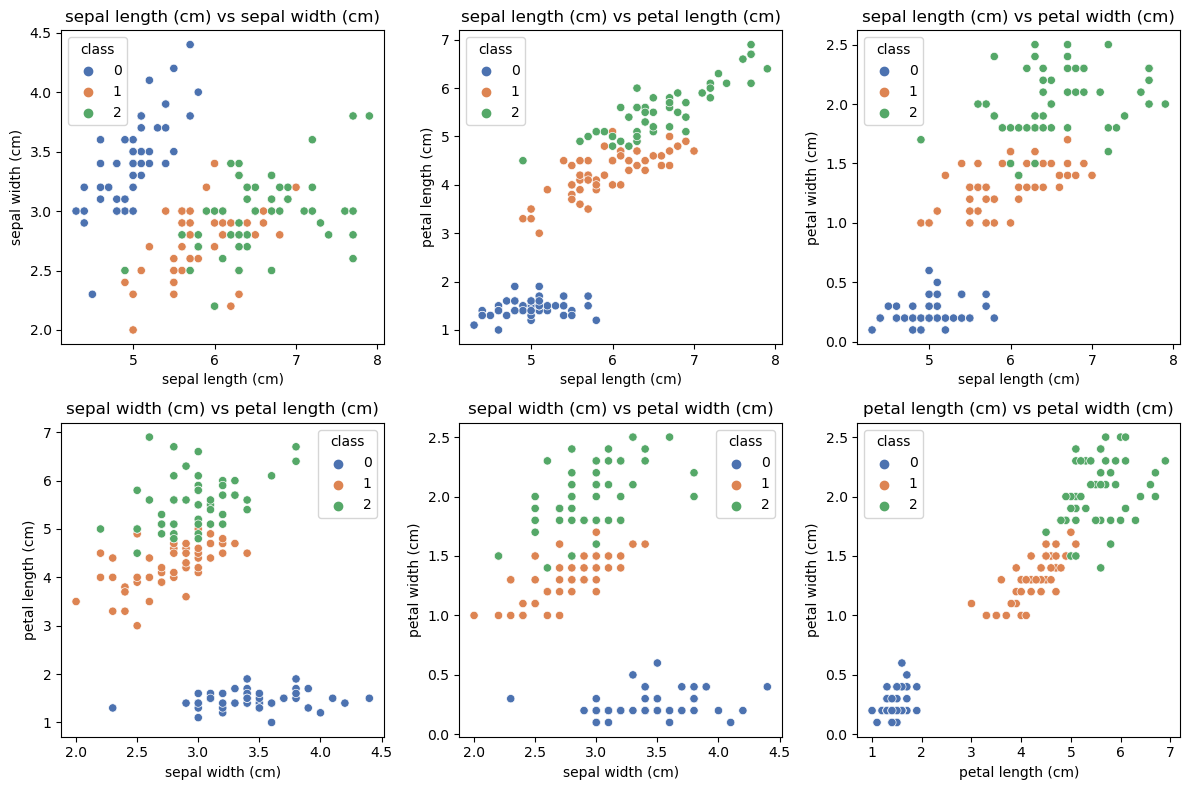

In [10]:
X = iris.data
y = iris.target
feature_names = iris.feature_names

df = pd.DataFrame(X, columns=feature_names)
df['class'] = y

# Liste des combinaisons de paires de variables
combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Affichage des nuages de points pour chaque combinaison
plt.figure(figsize=(12, 8))
for i, (x_idx, y_idx) in enumerate(combinations):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=df.iloc[:, x_idx], y=df.iloc[:, y_idx], hue=df['class'], palette='deep')
    plt.xlabel(feature_names[x_idx])
    plt.ylabel(feature_names[y_idx])
    plt.title(f'{feature_names[x_idx]} vs {feature_names[y_idx]}')

plt.tight_layout()
plt.show()

sepal witdh(cm) vs petal witdh(cm) est la meilleure parce que les nuages des classes sont quasiment separés , ce qui facilite de trouver les bonnes separateurs 

# D. Réduction de dimensions et visualisation de données

### 1. Importation de PCA et LDA

In [11]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### 2. Application de PCA et LDA

In [12]:
pca = PCA(n_components=2)  # réduire à 2 dimensions
IrisPCA = pca.fit(X).transform(X)  

In [13]:

lda = LDA(n_components=2)  # réduire à 2 dimensions
IrisLDA = lda.fit(X, y).transform(X)

### 3. Visualisation 

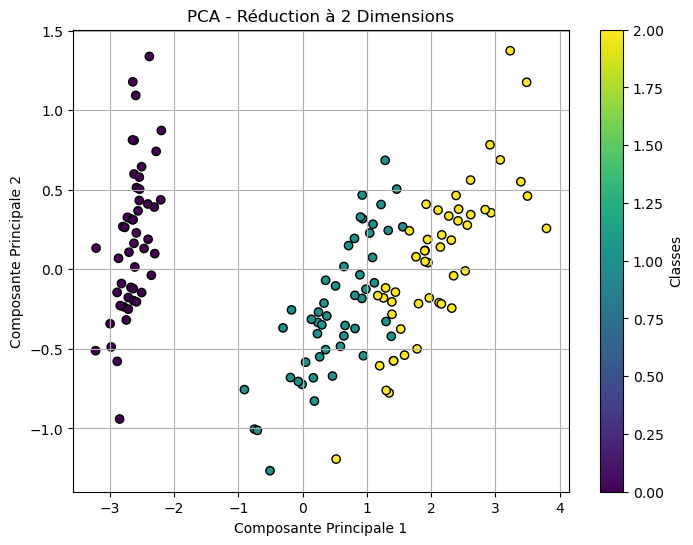

In [14]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(IrisPCA[:, 0], IrisPCA[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA - Réduction à 2 Dimensions')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.colorbar(scatter, label='Classes')
plt.grid()
plt.show()

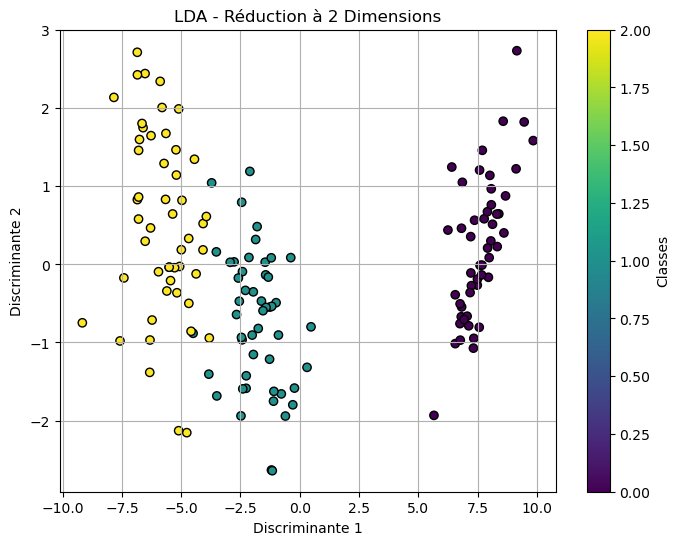

In [15]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(IrisLDA[:, 0], IrisLDA[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('LDA - Réduction à 2 Dimensions')
plt.xlabel('Discriminante 1')
plt.ylabel('Discriminante 2')
plt.colorbar(scatter, label='Classes')
plt.grid()
plt.show()

LDA represente une separation plus claire que PCA,

### Auteur

BAZZAOUI Hicham

Crée lundi 06 Octobre 2024